In [1]:
#import the necessary packages
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import mne
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

## Read some raw data

In [3]:
#EDF file
original_data_folder = Path('/Volumes/Macintosh HD - Data/Master Thesis/chb-mit-scalp-eeg-database-1.0.0')
Patient = ['chb04','chb06','chb08','chb15','chb17','chb19']
raw_file = os.path.join(original_data_folder,Patient[0],'{}_{}.edf'.format(Patient[0],'28'))

#Read in raw data
raw = mne.io.read_raw_edf(raw_file,preload=True)

#Get a list of all channels:
channels = raw.ch_names

raw_data = raw.get_data(return_times=True)
t = raw_data[1]

Extracting EDF parameters from /Volumes/Macintosh HD - Data/Master Thesis/chb-mit-scalp-eeg-database-1.0.0/chb04/chb04_28.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3692287  =      0.000 ... 14422.996 secs...


In [4]:
#channels

len(channels)

24

## FFT

Effective window size : 1.000 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


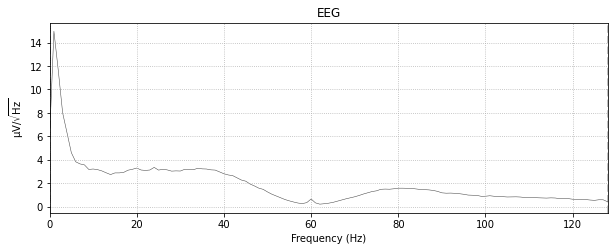

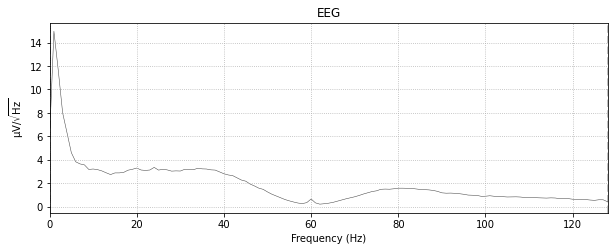

In [5]:
raw.plot_psd(picks=channels[0],n_overlap=128,n_fft=256,dB=False)

Effective window size : 1.000 (s)


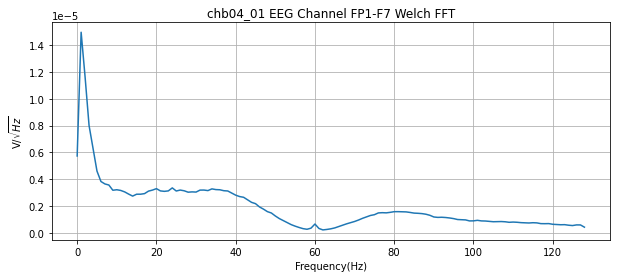

In [6]:
psd,freqs = mne.time_frequency.psd_array_welch(raw_data[0][0],sfreq=raw.info['sfreq'], n_fft=256,n_overlap=128)
plt.figure(figsize=(10, 4))
plt.plot(freqs,np.sqrt(psd))
plt.xlabel('Frequency(Hz)')
plt.ylabel(r'V/$\sqrt{Hz}$')
plt.title('{}_{} EEG Channel {} Welch FFT'.format(Patient[0],'01',channels[0]))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.grid(True)

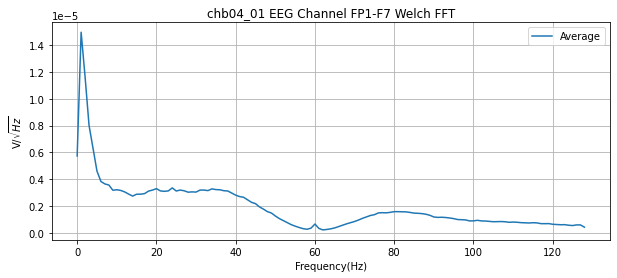

In [7]:
df = pd.DataFrame(psd,index=freqs)
df_mean = np.sqrt(df.mean(axis=1))

plt.figure(figsize=(10, 4))
df_mean.plot(label='Average')
plt.legend()
plt.xlabel('Frequency(Hz)')
plt.ylabel(r'V/$\sqrt{Hz}$')
plt.title('{}_{} EEG Channel {} Welch FFT'.format(Patient[0],'01',channels[0]))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.grid(True)

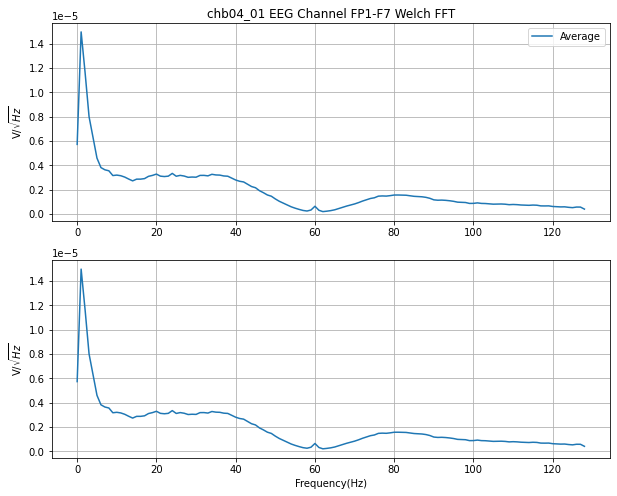

In [8]:
plt.figure(figsize=(10, 8))
plt.subplot(211)
df_mean.plot(label='Average')
plt.legend()
plt.ylabel(r'V/$\sqrt{Hz}$')
plt.title('{}_{} EEG Channel {} Welch FFT'.format(Patient[0],'01',channels[0]))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.grid(True)
plt.subplot(212)
plt.plot(freqs,np.sqrt(psd))
plt.xlabel('Frequency(Hz)')
plt.ylabel(r'V/$\sqrt{Hz}$')
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.grid(True)
plt.savefig('ch04_01/{}_{} EEG Channel {} Welch FFT.png'.format(Patient[0],'01',channels[0]))

In [ ]:
#for i in range(len(raw_data[0])):
#    psd,freqs = mne.time_frequency.psd_array_welch(raw_data[0][i],sfreq=raw.info['sfreq'],
#                                                   n_fft=256,n_overlap=128,average=None)
#    df = pd.DataFrame(psd,index=freqs)
#    df_mean = np.sqrt(df.mean(axis=1))
#    plt.figure(figsize=(10, 8))
#    plt.subplot(211)
#    df_mean.plot(label='Average')
#    plt.legend()
#    plt.ylabel(r'V/$\sqrt{Hz}$')    
#    plt.title('{}_{} EEG Channel {} Welch FFT'.format(Patient[0],'01',channels[i]))
#    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
#    plt.grid(True)
#    plt.subplot(212)
#    plt.plot(freqs,np.sqrt(psd))
#    plt.xlabel('Frequency(Hz)')
#    plt.ylabel(r'V/$\sqrt{Hz}$')
#    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
#    plt.grid(True)
#    plt.savefig('ch04_01/{}_{} EEG Channel {} Welch FFT.png'.format(Patient[0],'01',channels[i]))

In [9]:
psd,freqs = mne.time_frequency.psd_array_welch(raw_data[0][0],sfreq=raw.info['sfreq'], n_fft=256,n_overlap=128,average=None)
df = pd.DataFrame(psd,index=freqs)

Effective window size : 1.000 (s)


In [10]:
df

,0,1,2,3,4,5,6,7,8,9,...,28835,28836,28837,28838,28839,28840,28841,28842,28843,28844
0.0,1.434222e-12,7.080782e-15,2.975112e-14,4.445282e-13,9.955790e-12,2.462157e-11,8.940384e-12,2.132543e-12,9.425792e-13,6.953914e-14,...,3.554452e-13,1.949537e-12,2.693805e-17,1.735824e-12,1.096260e-14,1.846982e-12,3.044297e-13,9.818730e-13,1.658051e-13,1.046874e-12
1.0,2.687356e-12,3.171250e-12,1.986108e-11,1.910962e-11,1.727510e-11,8.022910e-11,3.222546e-11,2.086553e-12,1.567033e-11,5.185136e-11,...,7.860984e-12,3.281022e-11,2.922544e-11,2.101989e-11,3.276822e-12,1.542814e-11,2.407637e-12,1.014661e-12,3.470994e-11,9.005593e-12
2.0,4.783954e-13,1.214676e-11,2.071525e-11,2.598698e-13,4.414669e-12,2.210156e-11,6.156785e-12,2.487405e-12,2.634402e-13,7.114254e-12,...,4.209942e-12,9.554431e-12,1.038494e-12,6.624099e-12,8.858954e-13,2.965347e-11,4.918759e-12,2.231168e-11,5.484460e-11,1.588119e-11
3.0,5.625813e-12,9.424649e-12,2.213801e-11,1.409689e-12,9.778691e-12,6.413804e-13,1.898027e-12,2.104370e-12,1.004737e-11,4.710207e-12,...,6.289358e-13,1.189064e-11,2.033400e-11,1.236001e-12,3.392631e-13,7.421442e-12,1.099185e-11,1.505114e-11,2.411452e-11,5.855577e-12
4.0,3.736528e-12,1.164555e-11,3.872343e-12,1.329071e-12,8.342222e-12,4.044815e-12,6.154024e-13,2.106224e-13,7.480567e-12,2.461470e-12,...,6.315127e-12,2.887122e-11,4.074507e-12,9.121307e-13,5.073679e-13,1.701561e-12,3.297867e-12,1.053791e-11,1.409542e-11,3.010754e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124.0,3.276942e-14,7.172936e-14,8.997419e-15,3.093591e-14,3.258073e-15,1.580248e-14,3.356077e-15,6.264192e-15,2.487642e-14,3.291109e-14,...,1.262121e-15,5.137475e-15,4.371664e-15,1.014381e-15,2.423906e-15,8.425601e-16,9.490964e-16,3.266005e-16,1.298886e-15,2.769625e-16
125.0,8.038995e-16,2.289504e-15,3.279770e-14,1.850254e-14,6.922629e-15,3.791977e-15,4.982364e-15,7.475133e-15,3.804617e-15,1.411965e-14,...,4.904982e-15,1.646429e-16,1.057784e-15,4.377831e-16,4.000962e-15,1.310405e-16,1.356768e-16,3.669917e-15,2.457004e-15,3.294780e-16
126.0,9.520962e-15,3.184335e-14,3.591598e-15,2.006809e-14,7.481401e-16,1.292238e-16,2.939417e-14,3.926396e-15,3.922690e-15,1.367621e-15,...,2.208696e-15,1.182610e-15,1.127156e-15,1.237818e-15,8.369450e-16,2.525567e-16,1.326746e-15,1.415428e-15,1.838898e-15,3.508204e-16
127.0,2.726394e-14,1.251292e-14,3.502362e-14,3.168556e-14,2.660157e-15,4.141661e-15,1.706606e-14,5.563724e-15,2.307697e-15,2.907063e-15,...,3.795516e-16,8.593531e-16,1.547925e-15,8.620875e-17,7.733740e-17,2.305638e-16,4.331294e-15,9.092361e-16,2.401787e-15,3.344219e-16


In [17]:
def create_bins(df,nobins=16):
    to_rtn = df.copy()
    bins = {}
    for col in to_rtn.columns:
        to_rtn[col],binR = pd.qcut(to_rtn[col],q=nobins,retbins=True,duplicates='drop',labels=False)
        bins[col] = binR
        to_rtn[col] = to_rtn[col].astype('category')
        to_rtn[col] = to_rtn[col].cat.set_categories([str(i) for i in to_rtn[col].cat.categories], rename = True)
        #Infinity
        bins[col][0] = -np.inf
        bins[col][-1] = np.inf
    return to_rtn,bins

In [18]:
train_df, binning = create_bins(df,nobins=16)

In [19]:
display("train_df",train_df)

'train_df'

,0,1,2,3,4,5,6,7,8,9,...,28835,28836,28837,28838,28839,28840,28841,28842,28843,28844
0.0,15,1,4,13,15,15,15,15,14,7,...,13,14,0,15,10,15,14,14,13,14
1.0,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
2.0,13,15,15,11,15,15,15,15,11,15,...,15,15,14,15,15,15,15,15,15,15
3.0,15,15,15,14,15,13,15,15,15,15,...,14,15,15,15,14,15,15,15,15,15
4.0,15,15,15,14,15,15,13,11,15,14,...,15,15,15,15,15,14,15,15,15,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124.0,5,8,2,4,1,4,1,2,5,5,...,5,8,8,4,6,3,3,2,4,1
125.0,0,0,5,3,2,0,1,2,1,2,...,8,0,4,3,8,0,0,7,7,1
126.0,2,5,1,3,0,0,5,1,1,0,...,7,3,4,4,3,1,4,4,5,2
127.0,4,2,5,4,1,1,3,2,0,1,...,2,3,5,0,0,1,7,3,6,2
